In [10]:
import sys
!{sys.executable} -m pip install deap

In [11]:
import pandas as pd
import numpy as np
import random
from deap import base, creator, tools, algorithms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

# Load dataset from CSV
data = pd.read_csv('./eclipse.csv')

# Convert 'post' column to binary
data['post_binary'] = data['post'].apply(lambda x: 1 if x > 0 else 0)

# Prepare the feature matrix (X) and the target vector (y)
X = data.drop(columns=['plugin', 'filename', 'pre', 'post', 'post_binary'])  # Dropping non-numeric and target columns
y = data['post_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# GA code:

#Evaluation function for ranking
def evalMetricRanking(individual):
    # Use the order in the individual to select features
    X_train_ordered = X_train.iloc[:, individual]
    X_test_ordered = X_test.iloc[:, individual]
    
    # For demonstration, just using first three ordered features for evaluation
    X_train_selected = X_train_ordered.iloc[:, :3]
    X_test_selected = X_test_ordered.iloc[:, :3]
    
    clf = SVC(probability=True)
    clf.fit(X_train_selected, y_train)
    y_pred = clf.predict(X_test_selected)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy,

# Setting up the Genetic Algorithm

# Creating types
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

# Registering the functions
toolbox = base.Toolbox()
N_FEATURES = X_train.shape[1]
toolbox.register("indices", random.sample, range(N_FEATURES), N_FEATURES)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("evaluate", evalMetricRanking)

# Running the Genetic Algorithm
pop = toolbox.population(n=50)
hof = tools.HallOfFame(1)
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("avg", np.mean)
stats.register("min", np.min)
stats.register("max", np.max)
algorithms.eaSimple(pop, toolbox, cxpb=0.7, mutpb=0.2, ngen=20, stats=stats, halloffame=hof, verbose=True)


C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\deap\creator.py:185: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


gen	nevals	avg     	min     	max    
0  	50    	0.850486	0.846154	0.85748
1  	38    	0.852591	0.847098	0.85748
2  	34    	0.854063	0.847098	0.85748
3  	32    	0.855017	0.848042	0.857952
4  	39    	0.856866	0.850401	0.857952
5  	35    	0.857197	0.849929	0.857952
6  	36    	0.857291	0.847098	0.857952
7  	34    	0.856942	0.848042	0.857952
8  	41    	0.857338	0.848513	0.858896
9  	43    	0.857338	0.846626	0.858896
10 	43    	0.857895	0.853233	0.858896
11 	34    	0.858065	0.848513	0.858896
12 	44    	0.85832 	0.853233	0.858896
13 	31    	0.858792	0.85748 	0.858896
14 	39    	0.858773	0.856064	0.858896
15 	37    	0.858669	0.853705	0.858896
16 	39    	0.85882 	0.857008	0.858896
17 	36    	0.85882 	0.857008	0.858896
18 	41    	0.858849	0.85748 	0.858896
19 	43    	0.858537	0.848042	0.858896
20 	33    	0.858782	0.857008	0.858896


([[27,
   30,
   135,
   4,
   58,
   127,
   6,
   79,
   57,
   14,
   42,
   162,
   18,
   60,
   160,
   120,
   94,
   10,
   184,
   112,
   25,
   54,
   196,
   151,
   182,
   173,
   161,
   59,
   191,
   17,
   154,
   82,
   65,
   81,
   11,
   2,
   107,
   43,
   138,
   128,
   83,
   92,
   186,
   122,
   73,
   178,
   168,
   63,
   109,
   55,
   181,
   179,
   29,
   53,
   150,
   26,
   86,
   167,
   190,
   137,
   110,
   1,
   172,
   46,
   28,
   64,
   116,
   91,
   8,
   113,
   111,
   88,
   0,
   102,
   87,
   126,
   158,
   39,
   56,
   7,
   100,
   175,
   5,
   188,
   74,
   93,
   96,
   15,
   187,
   166,
   20,
   125,
   77,
   47,
   197,
   145,
   129,
   84,
   123,
   70,
   101,
   51,
   155,
   140,
   164,
   144,
   35,
   40,
   180,
   136,
   66,
   130,
   22,
   36,
   189,
   69,
   80,
   149,
   106,
   76,
   24,
   71,
   121,
   169,
   156,
   44,
   115,
   16,
   157,
   159,
   98,
   134,
   114,
   171,
   6

Best ranked features:  [27, 30, 173]
Accuracy:  0.8588957055214724
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1797
           1       0.79      0.10      0.17       322

    accuracy                           0.86      2119
   macro avg       0.83      0.55      0.55      2119
weighted avg       0.85      0.86      0.81      2119



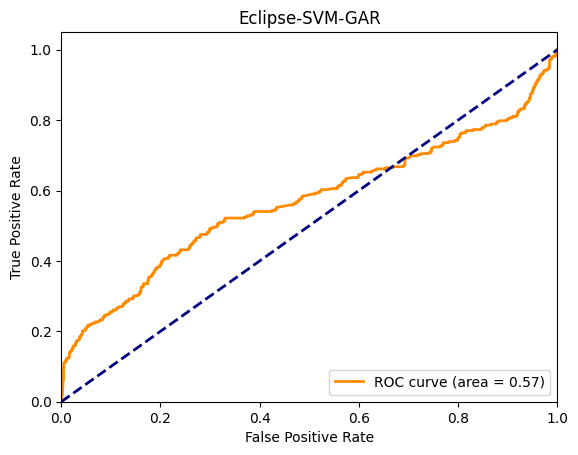

In [14]:
# Train and evaluate the KNN classifier using the best ranked features
best_ranking = hof[0]
# Let's say we use the top 3 ranked features (you can adjust this number)
selected_features = best_ranking[:3]
print("Best ranked features: ", selected_features)

X_train_selected = X_train.iloc[:, selected_features].values
X_test_selected = X_test.iloc[:, selected_features].values

clf = SVC(probability=True)
clf.fit(X_train_selected, y_train)

# Test the classifier
y_pred = clf.predict(X_test_selected)
print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

# Probabilities for the positive outcome
y_pred_proba = clf.predict_proba(X_test_selected)[:,1]
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Save AUC values
df = pd.DataFrame({
    'AUC': roc_auc,
    'FPR': fpr,
    'TPR': tpr
})
df.to_csv('./AUC_Extracts/Eclipse/Eclipse_SVM_GAR.csv', index=False)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Eclipse-SVM-GAR')
plt.legend(loc="lower right")
plt.show()